# mejorar la lstm y entender como se le pasan los datos
# hacer el manejo de las ventanas, que se pueda decidir que tanto periodo de tiempo se quiere y desde cuando
# buen entrenamiento y prueba
# empezar con el archivo backtesting para probar

# Getting the Data


In [96]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [97]:
def plot_data(time_series, title):
  plt.plot(time_series)
  plt.title(title)
  plt.show()

In [98]:
DATA = yf.download("AAPL", start="2020-01-01", end="2023-01-01")
train_data = DATA[['Open', 'High', 'Low', 'Volume']]
train_price_data = DATA['Close']
DATA_test = yf.download("AAPL", start="2023-01-02", end="2024-08-01")
test_data = DATA_test[['Open', 'High', 'Low', 'Volume']]
test_price_data = DATA_test['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [103]:
print(DATA.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2020-01-02  74.059998  75.150002  73.797501  75.087502  72.876106  135480400
2020-01-03  74.287498  75.144997  74.125000  74.357498  72.167603  146322800
2020-01-06  73.447502  74.989998  73.187500  74.949997  72.742661  118387200
2020-01-07  74.959999  75.224998  74.370003  74.597504  72.400551  108872000
2020-01-08  74.290001  76.110001  74.290001  75.797501  73.565201  132079200


In [107]:
len(DATA)

756

In [102]:
def normalize_data(data):
    scaler = MinMaxScaler()
    data_norm = scaler.fit_transform(data)
    return data_norm

def desnormalizar(predictions):
    scaler = MinMaxScaler()
    return scaler.inverse_transform(predictions)


def crear_ventanas_tiempo(data, window_size=20, target_column=0):
    X = []
    y = []

    # Si el dataset es un DataFrame, lo convertimos a numpy array
    if hasattr(data, 'values'):
        data = data.values

    # Crear ventanas de tiempo
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])  # Ventana de entrada
        y.append(data[i, target_column])  # Etiqueta de salida (por defecto es la primera columna)

    # Convertir listas a numpy arrays
    X = np.array(X)
    y = np.array(y)

    return X, y

In [101]:
print(train_data.head())

                 Open       High        Low     Volume
Date                                                  
2020-01-02  74.059998  75.150002  73.797501  135480400
2020-01-03  74.287498  75.144997  74.125000  146322800
2020-01-06  73.447502  74.989998  73.187500  118387200
2020-01-07  74.959999  75.224998  74.370003  108872000
2020-01-08  74.290001  76.110001  74.290001  132079200


In [105]:
X, Y = crear_ventanas_tiempo(train_data, target_column= 3)
print(X.shape)
print(Y.shape)

(736, 20, 4)
(736,)


In [106]:
print(X)

[[[7.40599976e+01 7.51500015e+01 7.37975006e+01 1.35480400e+08]
  [7.42874985e+01 7.51449966e+01 7.41250000e+01 1.46322800e+08]
  [7.34475021e+01 7.49899979e+01 7.31875000e+01 1.18387200e+08]
  ...
  [7.81500015e+01 7.95999985e+01 7.80475006e+01 1.62234000e+08]
  [8.11125031e+01 8.19625015e+01 8.03450012e+01 2.16229200e+08]
  [8.01350021e+01 8.10224991e+01 7.96875000e+01 1.26743200e+08]]

 [[7.42874985e+01 7.51449966e+01 7.41250000e+01 1.46322800e+08]
  [7.34475021e+01 7.49899979e+01 7.31875000e+01 1.18387200e+08]
  [7.49599991e+01 7.52249985e+01 7.43700027e+01 1.08872000e+08]
  ...
  [8.11125031e+01 8.19625015e+01 8.03450012e+01 2.16229200e+08]
  [8.01350021e+01 8.10224991e+01 7.96875000e+01 1.26743200e+08]
  [8.02324982e+01 8.06699982e+01 7.70725021e+01 1.99588400e+08]]

 [[7.34475021e+01 7.49899979e+01 7.31875000e+01 1.18387200e+08]
  [7.49599991e+01 7.52249985e+01 7.43700027e+01 1.08872000e+08]
  [7.42900009e+01 7.61100006e+01 7.42900009e+01 1.32079200e+08]
  ...
  [8.01350021e+01 

In [70]:
window_size = 20
data = train_data.values
X = []
y = []

for i in range(window_size, len(data)):
    X.append(data[i-window_size:i])
    y.append(data[i, 0])


X = np.array(X)
y = np.array(y)

In [63]:
print(train_price_data.head())

Date
2020-01-02    75.087502
2020-01-03    74.357498
2020-01-06    74.949997
2020-01-07    74.597504
2020-01-08    75.797501
Name: Close, dtype: float64


In [64]:
print(len(train_data['Open']))

756


In [73]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(164, return_sequences=True),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32, return_sequences=False),
    tf.keras.layers.Dense(32 ,activation='relu'),
    tf.keras.layers.Dense(1)
    ])
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
model.fit(X, y, epochs=100)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 17862.0176
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 17032.5625
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 16465.1035
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 15331.9121
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 14205.0332
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - loss: 12989.8848
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - loss: 12066.7959
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 10875.5811
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 9534.1914
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 8516.3291
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 6798.1328
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 6216.3965
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 5134.7227
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 4213.6187
Epoch 1

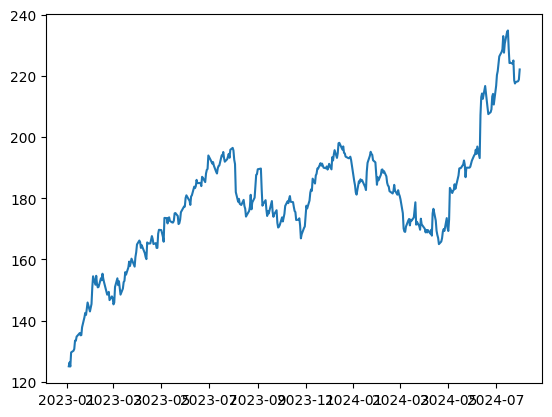

In [76]:
plt.plot(test_price_data)
plt.show()

In [83]:
inferenced_data = model.predict(XT)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [91]:
print(inferenced_data)

[[131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]
 [131.45442]

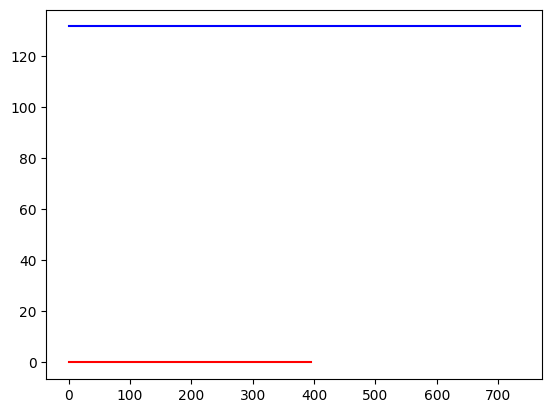

In [94]:
plt.plot(prices_norm, color = "red")
plt.plot(inferenced_data, color = "blue")

plt.show()